<a href="https://colab.research.google.com/github/glauciodrumond/Data_Analysis/blob/master/%5BPROJECT%5D_Cardiovascular_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Cardiovascular Diseases

Cardiovascular diseases (CVDs) is a class of diseases or disorders of the heart and blood vessels. There are a lot of diseases included in this class as congenital heart disease, rheumatic heart disease,peripheral arterial disease and others.

<p><img alt="Colaboratory logo" height="" src="https://img.medscape.com/thumbnail_library/is_191223_heart_disease1_800x450.jpg"   vspace="0px"></p>


Despite being one of the main causes of death worldwide, it is estimated that about 90% of cardiovascular diseases could be prevented by adopting some measures and changes in lifestyle.

In these days, there are several researches in the Machine Learning area aiming at the construction of predictive models that can help doctors discover cardiovascular diseases in their patients.

Studies published in the magazine Nature Biomedical Engineering Machine, shows that Deep Learning algorithms were able to anticipate cardiovascular diseases up to 5 years.
Definitely, the use of Artificial Intelligence has deeply impacted the health area, and has provided, to professionals doctors, increasingly accurate intelligence inputs.



## GETTING THE DATA

The main data set used in this project was collect from  ***Cleveland Clinic Foundation*** and is available in the well known [Repository UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease).It is noteworthy that the names, identity and personal documents of the patients were completely removed from the database.

The processed *dataset* contains data from 303 people and has 76 attributes. However, the main articles and published studies chose to use only 14 attributes, considered of greater relevance. The same way, this *Data Science* project will use these same 14 main variables.

<p><img alt="Colaboratory logo" height="100" src="https://www.netclipart.com/pp/m/181-1814526_heartburn-human-coronary-heart-disease.png" align="right" hspace="20px" vspace="0px"></p>

* The`csv` file with the data of 303 people and 14 attributes can be downloaded in [this link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* The file containing all the details and documentation of the dataset used in this project can be found in [this link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* There is also a secondary *dataset* that will be used to see the evolution in the number of deaths from cardiovascular diseases in Brazil (between the years 2004-2017). These data were made available by the [Brazilian Society of Cardiology](http://www.cardiometro.com.br/anteriores.asp), and can be downloaded in [this link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).

### Attribute information:

* `age` - in years
* `sex` - patient gender
  * 0: woman
  * 1: men
* `cp` - type of chest pain
  * 1: typical angina
  * 2: atypical angina
  * 3: non-cardiac pain
  * 4: asymptomatic
* `trestbps` - resting blood pressure
* `chol` - serum cholesterol (*mg/dl*)
* `fbs` - fasting blood sugar > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - result of resting electrocardiography
  * 0: normal
  * 1: abnormalities of ST-T  (inversion of the T wave and elevation or depression > 0.05*mV*)
  * 2: ventricular Hypertrophy probable left or definitive (by the Romhilt-Estes criteria)
* `thalach` - maximum heart rate reached
* `exang` - exercise-induced angina
  * 0: no
  * 1: yes
* `oldpeak` - exercise-induced ST segment depiction in relation to rest
* `slope` - ST segment slope at peak exercise
* `ca` - number of main vessels colored by fluoroscopy
* `thal` - *thallium stress test*
  * 3: normal
  * 6: fixed defect
  * 7: reversible defect
* `num` - diagnosis of heart disease (angiographic diagnosis)
  * 0: no heart disease ( < 50% diameter narrowing)
  * 1,2,3,4: there is heart disease ( > 50% diameter narrowing)



###Import the Data

In an initial step, we will import the two *datasets* mentioned at the beginning of the notebook:

*  One containing data related to cardiovascular diseases (303 people and 14 attributes); and
*  One containing data on mortality in Brazil due to cardiovascular diseases.


In [1]:
# importing the necessary libraries
# importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

# datasets url
# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importing UCI's dataset
# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importing indice's dataset from Brazil
# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Looking above the information about the attributes, we realize that our target variable  (`num`)  has five possible values: \[0, 1, 2, 3, 4\].

However, following most of the researches that used this dataset, we will consider only two possible situations:

*  0 - no heart disease
*  1 - there is heart disease

Then, we will match the values ​​between 1-4 to 1.


In [2]:
# target variable before
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# convert values> = 1 to 1
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [4]:
# target variable after
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

# EXPLORATORY DATA ANALYSIS

To understand our dataset,  I will do an exploratory analysis to discover any patterns, to find anomalies, to create and check hypothesis using chart representations and summary statistics. Doing this we can clean our dataset and use the data wisely.


## Dataframe Shape
*First let's check the number rows and columns our dataframe has using the `shape` attribute of pandas.Dataframe*

In [5]:
# Shows rows and columns
# Mostras linhas e colunas
print ('Rows: ' , df.shape[0]) 
print ('Columns: ' , df.shape[1])


Rows:  303
Columns:  14


## Variables distribution
Using the  `head()` method, that shows the first 5 entries of our dataframe by default, and `tail()`method, that shows the last 5 entries of our dataframe by default, it is possible to check how the variables are distribute and confirm if we really have 303 rows and 14 columns.

It is possible to pass a custom number, to show more or less entries, and that's what we will do here passing the number 3.


In [6]:
# First 3 entries
# 3 primeiras entradas
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


In [7]:
# Last 3 entries
# Ultimas 3 entradas
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


## Variables type
Now that we can see a small sample of our dataframe, we will check the variables types, using `dtypes` method, doing this we will be aware of the functions that can be performed in each variable.

In [8]:
# Variables types
# Tipos de Variaveis
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

## Summary statistics
Applying the `describe()` method we can see our first statistics summary from all numerical columns. 
As you can see below  some basic statistical details like max, min ,mean, std etc.


In [9]:
# Shows summary statistics
# Mostra estatísticas resumidas
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Is there any null value in our dataframe? If so How many?

Using the pandas method `.isnull()` with `sum()` we answered those questions, observing that there's no null value in our dataframe.

In [10]:
# Look for null values and sum it
# Procura valores nulos e soma quantos sao 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

##How many values ​​has no heart disease and how many has heart disease  in the dataset?
Using pandas method `value_counts()` that shows the values in a column with the number of occurrences, we can see that:


*   164 has no heart disease
*   139 has heart disease



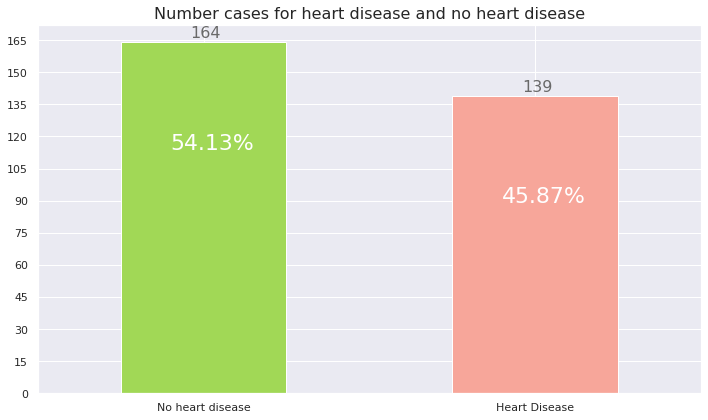

In [11]:
# Count value in column with number occurrences
# Contar valores na coluna
#df.num.value_counts(0)

# plot bar chart showing number men and women
# gera grafico de barra mostrando numero de homens e mulheres

colors = ['#a1d856', '#f7a69a']
fig, ax = plt.subplots(figsize=(10,6))
name = ["No heart disease" , "Heart Disease"]
ax = df.num.value_counts().plot(kind = 'bar', color = colors)
ax.set_title("Number cases for heart disease and no heart disease", fontsize = 16)
ax.set_xticklabels (name, rotation = 0)
ax.yaxis.set_major_locator(ticker.MultipleLocator(15))

# find the values and append to list to create percent
# acha os valores e adiciona a lista para calcular porcentagem
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    # get_x puxa esquerda ou direita ; get_height empurra pra cima ou pra baixo
    ax.text(i.get_x()+.21, i.get_height()+2, \
            str(round((i.get_height()), 2)), fontsize=16, color='dimgrey',
                rotation=0)

# create a list to collect the plt.patches data
# cria uma list para guardar a data do plt.patches 
totals = []

# find the values and append to list
# acha os valores e adiciona a lista
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

# set individual (percent) bar lables using above list
# coloca rotulos (porcentagem) individuais nas barras usando a lista acima
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    # get_x puxa esquerda ou direita ; get_height empurra pra cima ou pra baixo
    ax.text(i.get_x()+.15, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

plt.tight_layout()

## How many deaths from heart disease happen in brazil?

Using of second dataframe (df_brasil), I've made a line chart and now we can check how many deaths was caused by heart diseases in Brazil, see if it's incresing or decresing and do other analysis. 
Let's get to it! 

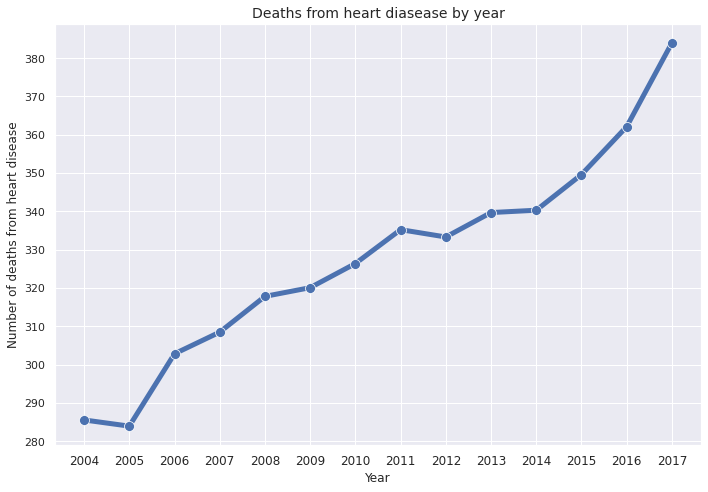

In [12]:
# Line  chart using seaborn to show deaths from heart disease in df_brasil
# grafico de linhas para mostrar mortes por doenças cardíacas do df_brasil

fig, ax = plt.subplots(figsize=(10,7))
ax = sns.lineplot ( x= 'ano' , y = 'mortes_doencas_cardio', data = df_brasil,
                    markers = True , dashes = False, linestyle='-', marker='o',
                   linewidth=5, markersize =10)

ax.set_title ('Deaths from heart diasease by year', fontsize = 14)
ax.set_xlabel('Year')
ax.set_ylabel('Number of deaths from heart disease')
ax.tick_params(axis='x',labelsize = 12, )
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()


Overall the heart disease in Brazil has been increasing every year speciali in the last 3 years shown in our data.

## How many men and women there is in the dataset? 

As you can see in our bar chart, 206 entries, from our dataset, are men and this represents almost 68% of the entries while 97 entries are women which represents about 32%. 


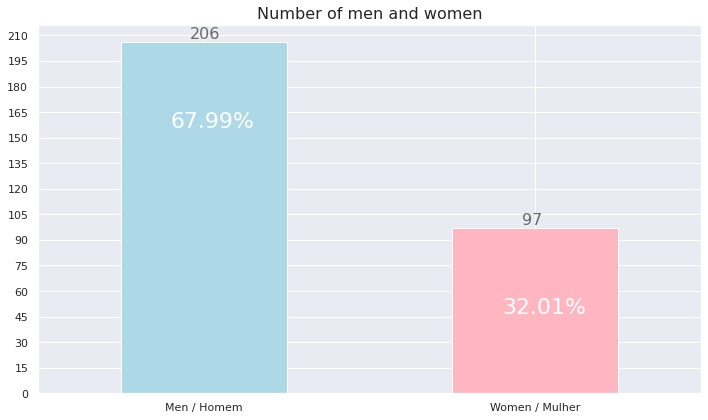

In [13]:
# plot bar chart showing number men and women
# gera grafico de barra mostrando numero de homens e mulheres

colors = ['lightblue', 'lightpink']
fig, ax = plt.subplots(figsize=(10,6))
name = ["Men / Homem" , "Women / Mulher"]
ax = df.sex.value_counts().plot(kind = 'bar', color = colors)
ax.set_title("Number of men and women", fontsize = 16)
ax.set_xticklabels (name, rotation = 0)
ax.yaxis.set_major_locator(ticker.MultipleLocator(15))

# find the values and append to list to create percent
# acha os valores e adiciona a lista para calcular porcentagem
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    # get_x puxa esquerda ou direita ; get_height empurra pra cima ou pra baixo
    ax.text(i.get_x()+.21, i.get_height()+2, \
            str(round((i.get_height()), 2)), fontsize=16, color='dimgrey',
                rotation=0)

# create a list to collect the plt.patches data
# cria uma list para guardar a data do plt.patches 
totals = []

# find the values and append to list
# acha os valores e adiciona a lista
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

# set individual (percent) bar lables using above list
# coloca rotulos (porcentagem) individuais nas barras usando a lista acima
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    # get_x puxa esquerda ou direita ; get_height empurra pra cima ou pra baixo
    ax.text(i.get_x()+.15, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='white')

plt.tight_layout()

## Is there a relationship between patients' age and cholesterol?

Together with scatterplot chart, that shows a relationship between our two variables, I decide to plot our regression line, which is a simple line that shows the best fit for our data based in our choosed variables.

According to an article from [Medical News Today](https://www.medicalnewstoday.com/articles/321519#normal-ranges): "doctors once determined whether a person’s serum cholesterol level was healthy by comparing it to established normal ranges."

Now before deciding whether a person's cholesterol is not healthy, doctors consider several factors like obesity,high blood pressure, smoking or tobacco use, family history and others.

For our dataset the range for healthy cholesterol is between 125mg/dl to 200mg/dl.

That being said we can see in our chart that the inclination the most people has cholesterol above 200mg/dl and the regression line has a slight slope which means that when a person gets older there is a tendency to increase cholesterol.

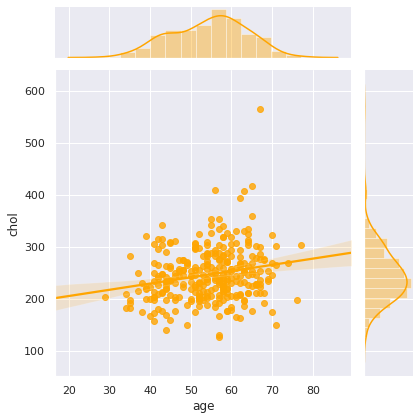

In [14]:
# Dispersion chart for variables age and chol
# Grafico dispersao para variaveis age e chol

ax = sns.jointplot('age', 'chol' , data=df, kind="reg",
                   truncate=False, color="orange", height = 6)


plt.tight_layout()

## What is the frequency for serum cholesterol?

Having a look at our chart we can confirm what the scatter plot shows, that our frequency for the variable is higher between 200mg/dl and 300mg/dl.


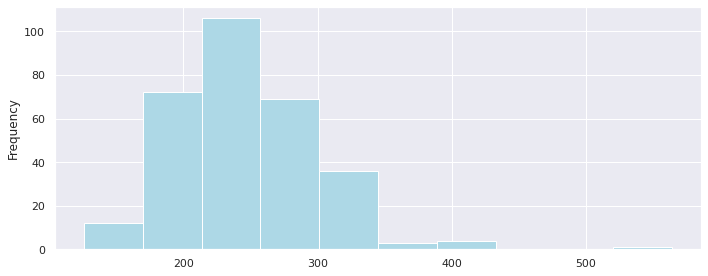

In [15]:
fig, ax = plt.subplots(figsize=(10,4))
ax = df.chol.plot.hist (bins =10 , color = 'lightblue')
plt.tight_layout()

## Result of Resting Electrocardiography

As we can see in our donut chart, almost 50% of our entries from the dataset has had normal results from resting electrocardiography, 1,3% has ST-T Abnormalities and the rest 48,8% has Ventricular Hypertrophy probable left or definitive(by the Romhilt-Estes criteria).





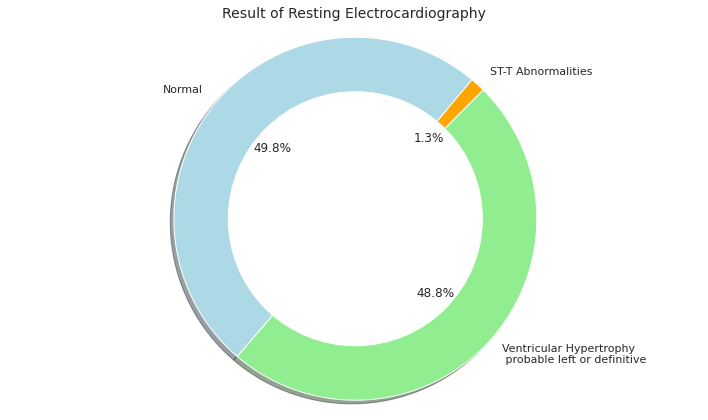

<Figure size 432x288 with 0 Axes>

In [16]:
# Donut chart
# Donut grafico
colors = ['lightblue' , 'lightgreen' , 'orange']
labels = ['Normal' , 'Ventricular Hypertrophy\n probable left or definitive ', 'ST-T Abnormalities']
explode = (0.01,0.01,0.00)
fig1 , ax1 = plt.subplots(figsize = (10,6))
ax1.pie( df.restecg.value_counts(), colors = colors, labels=labels,
        autopct='%1.1f%%', startangle=50, 
        shadow = True)
ax1.set_title ('Result of Resting Electrocardiography', fontsize = 14)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()
plt.tight_layout()

## Variables correlation

This method is a great way to see how the variables is correlated. The bigger the number the higher is the correlation. 

In the chart `slope`( ST segment slope at peak exercise) and `oldpeak`(exercise-induced ST segment depiction in relation to rest) is the variables with higher correlation, 0.58, followed by `thal`(thallium stress test) and `num`(diagnosis of heart disease) with 0.52.



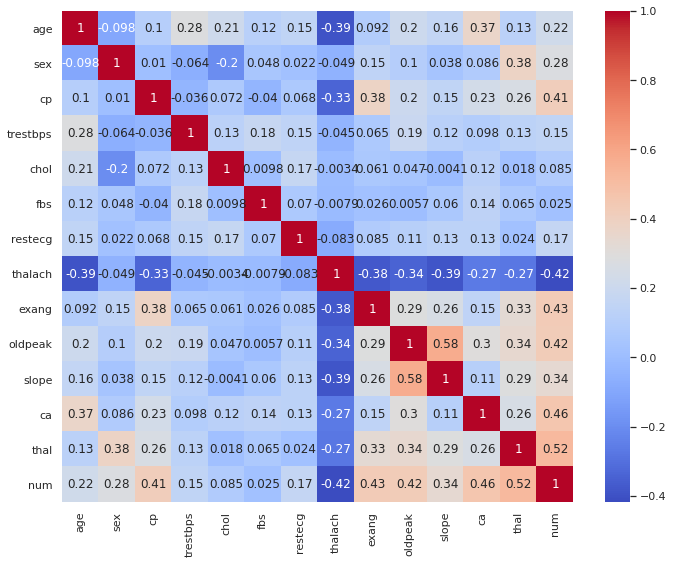

In [17]:
# plot correlation chart
# plotar um gafico de correlacao
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(df.corr() , fmt= '.2g', cmap='coolwarm',annot= True )
plt.tight_layout()

## Any outliers?

Outliers are values that are much bigger or smaller than the rest of the data.
In order to be an outlier, the data value must be:

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or
*   smaller than Q1 by at least 1.5 times the IQR.

<p><img alt="Colaboratory logo" height="330" src="https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png"   vspace="0px"></p>




Remembering the variables meaning:

* `chol` - serum cholesterol level in mg/dl
* `thalach` - maximum heart rate reached
* `trestbps` - resting blood pressure

As we can see we have some outliers in these variables.

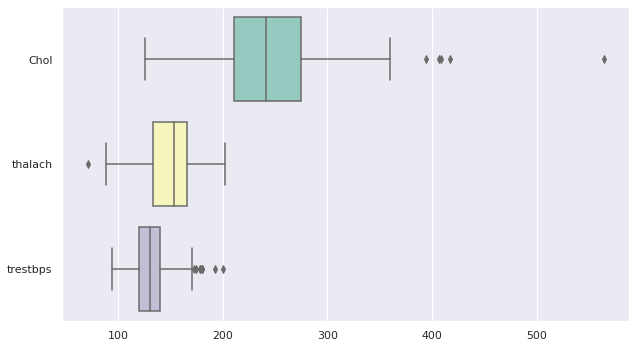

In [18]:
fig, ax = plt.subplots(figsize=(9,5))
name = ['Chol','thalach', 'trestbps']
ax = sns.boxplot(data = (df.chol, df.thalach,df.trestbps), orient='h',
                 palette = "Set3")
ax.set_yticklabels(name)
plt.tight_layout()

# Analysis conclusion

This is the first part of this project these are a few examples of data exploratory analysis that we can do when starting a data science project. 

Next part of these project is create a machine learning algorithm, based on predictive models, that can help discover cardiovascular diseases in patients.

# Machine Learning

After all the previous analysis done, We are finally getting to fun part of data science, at least to me, which is create the algorithm to detect if a patient has or doesn't have heart disease.

Looking at our data, the variable `num` refers to diagnosis of heart disease: if is zero means no heart disease and if is one means there is heart disease. This is exactly what we want to discover, so our variable `num` will be our target and the others variables will be our inputs.

In [0]:
# Create a variable that will contain the inputs 
# Criar a variável que ira conter nossas variáveis inputs  
unscaled_inputs = df.iloc[:, :-1] 
# Create a variable that will contain the targets (variable num)
# Criar a variavel que ira conter a variavel alvo (variavel num)
target = df.iloc[:, 13] 

## Standardize the data

Standardization is one of the most common preprocessing tools since data of different magnitude (scale) can be biased towards high values, we want all inputs to be of similar magnitude this is a peculiarity of machine learning in general - most (but not all) algorithms do badly with unscaled data.

A very useful module we can use is StandardScaler it has much more capabilities than the straightforward 'preprocessing' method.

Here's the full documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html



In [0]:
# standardize the inputs
# import the librarie
from sklearn.preprocessing import StandardScaler

# we will create a variable that will contain the scaling information for this particular dataset
# define scaler as an object
df_scaler = StandardScaler()

Let's import the libraries needed to create the Custom Scaler.
Note that all of them are a part of the sklearn package moreover, one of them is actually the StandardScaler module, so you can imagine that the Custom Scaler is build on it.


In [0]:
# importing the package
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

# create the Custom Scaler class
class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    # the fit method, which, again based on StandardScale
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling
    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [22]:
# check what are all columns that we've got
unscaled_inputs.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

Next step is choose the columns that we want to scale, some columns like `sex` is filled with boolean numbers, so we don't want to standardize columns like these.

The columns that we wont to standardize is: `sex`, `fbs`, `exang`

So the rest of the columns is going to be standardized

In [0]:
# select the columns to omit
columns_to_omit = ['sex', 'fbs', 'exang', 'restecg', 'cp']

In [0]:
# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [0]:
# declare a scaler object, specifying the columns you want to scale
df_scaler = CustomScaler(columns_to_scale)

In [26]:
# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
df_scaler.fit(unscaled_inputs)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope',
                      'ca', 'thal'],
             copy=None, with_mean=None, with_std=None)

We are going to standardizes the data, using the transform method in the last line, we fitted the data. In other words we found the internal parameters of a model that will be used to transform data. 

Transforming applies these parameters to our data.

Note that when you get new data, you can just call 'scaler' again and transform it in the same way as now.

In [0]:
# standardizing the selected columns
scaled_inputs = df_scaler.transform(unscaled_inputs)

In [28]:
# check the shape of the inputs
scaled_inputs.shape

(303, 13)

In [29]:
# the scaled_inputs are now an ndarray, because sklearn works with ndarrays
scaled_inputs

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.948726,1.0,1.0,0.757525,-0.264900,1.0,2.0,0.017197,0.0,1.087338,2.274579,-0.711131,0.660004
1,1.392002,1.0,4.0,1.611220,0.760415,0.0,2.0,-1.821905,1.0,0.397182,0.649113,2.504881,-0.890238
2,1.392002,1.0,4.0,-0.665300,-0.342283,0.0,2.0,-0.902354,1.0,1.346147,0.649113,1.432877,1.176752
3,-1.932564,1.0,3.0,-0.096170,0.063974,0.0,0.0,1.637359,0.0,2.122573,2.274579,-0.711131,-0.890238
4,-1.489288,0.0,2.0,-0.096170,-0.825922,0.0,2.0,0.980537,0.0,0.310912,-0.976352,-0.711131,-0.890238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,1.0,1.0,-1.234430,0.334813,0.0,0.0,-0.770990,0.0,0.138373,0.649113,-0.711131,1.176752
299,1.502821,1.0,4.0,0.700612,-1.038723,1.0,0.0,-0.376896,0.0,2.036303,0.649113,1.432877,1.176752
300,0.283813,1.0,4.0,-0.096170,-2.238149,0.0,0.0,-1.515388,1.0,0.138373,0.649113,0.360873,1.176752
301,0.283813,0.0,2.0,-0.096170,-0.206864,0.0,2.0,1.068113,0.0,-0.896862,0.649113,0.360873,-0.890238


## Data split


To split our data into training and test we will use scikit-learn tools to do this job, we also will shuffle our data this process to reduce the variance and make sure that our model remains general and overfit less. The process is describe below. By default our model is divided in 75% training and 25% test but I will change that and set the test size as 20% and training 80%.

In [0]:
# import train_test_split so we can split our data into train and test
# importar train_test_split para dividir nossos dados em treino e teste 
from sklearn.model_selection import train_test_split

In [31]:
# check how this method works
# ver como este metodo funciona
train_test_split(scaled_inputs, target)

[          age  sex   cp  trestbps  ...   oldpeak     slope        ca      thal
 85  -1.156832  1.0  3.0  0.472960  ... -0.896862 -0.976352 -0.711131 -0.890238
 16  -0.713556  1.0  2.0 -1.234430  ... -0.034166  2.274579 -0.711131  1.176752
 36  -1.267651  1.0  4.0 -0.665300  ...  1.259877  0.649113 -0.711131  1.176752
 5    0.172994  1.0  2.0 -0.665300  ... -0.206705 -0.976352 -0.711131 -0.890238
 174  1.059545  1.0  4.0  0.757525  ...  0.828529  0.649113  1.432877  0.660004
 ..        ...  ...  ...       ...  ...       ...       ...       ...       ...
 185  0.948726  0.0  2.0  0.472960  ... -0.896862 -0.976352  1.432877 -0.890238
 236  0.172994  1.0  4.0 -0.096170  ...  0.483451  2.274579 -0.711131  1.176752
 58  -0.048643  1.0  3.0 -0.380735  ... -0.465514  2.274579  0.360873 -0.890238
 171 -0.159462  1.0  4.0  0.586786  ... -0.896862 -0.976352 -0.711131  1.176752
 21   0.394632  0.0  1.0  1.042090  ... -0.034166 -0.976352 -0.711131 -0.890238
 
 [227 rows x 13 columns],
           a

In [32]:
# Splitting the dataset into the Training set and Test set
# Dividindo o conj de dados em treino a teste
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, 
                                                    target, test_size = 0.2,
                                                    random_state = 20)

# Check the shape of the train inputs and targets
# Checar o formato do dataset de treino e alvos
print ("Train:" ,X_train.shape, y_train.shape)

# check the shape of the test inputs and targets
# Checar o formato do dataset de teste e alvos
print ("Test: " , X_test.shape, y_test.shape)

Train:  (242, 13) (242,)
Test:  (61, 13) (61,)


# Logistic Regression

The statistical technique that we are going to use for this machine learning is logistic regression. This technique is used to predict something (in our case our binary variable `num`) from categorical variables.

Again we are going to import scikit-learn tools to handle this job for us.


In [0]:
# Import the LogReg model from sklearn
# Importar o LogReg do sklearn
from sklearn.linear_model import LogisticRegression
# Import the 'metrics' module, which includes important metrics we may want to use
# Importar o modulo 'metrics' que inclui metricas que queremos usar
from sklearn import metrics

## Training the model

With a line of code using the method fit() we can train or machine learning model and after that check it's accuracy.

In [0]:
# Create a logistic regression object
# Criar um objeto logistic regression
reg = LogisticRegression(C=0.01)

In [35]:
# Fit our train inputs
# Usar metodo fit para treinar as entradas
reg.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Assess the train accuracy of the model
# Avaliar a precisao de treino do modelo
reg.score(X_train,y_train)

0.8471074380165289

##Manually check the accuracy

In [37]:
# find the model outputs according to our model
# Achar as saidas do modelo de acordo com o nosso
model_outputs = reg.predict(X_train)
model_outputs

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [38]:
# Compare them with the targets
# Comparar elas com os alvos
y_train

197    0
0      0
265    1
24     1
292    1
      ..
71     1
278    1
218    0
223    1
271    0
Name: num, Length: 242, dtype: int64

In [39]:
# Actually compare the two variables
# Ou melhor vamos comparar as 2 variaveis
model_outputs == y_train

197     True
0       True
265     True
24      True
292     True
       ...  
71      True
278    False
218    False
223     True
271    False
Name: num, Length: 242, dtype: bool

In [40]:
# find out in how many instances we predicted correctly
# descobrir quantas instancias nosso modelo acertou
np.sum((model_outputs==y_train))

205

In [41]:
# get the total number of instances
# informar o numero total de instacias
model_outputs.shape[0]

242


Wow our model has about 85% accuracy, that's great! Let's double check that accuracy by calculating it…

In [42]:
# calculate the accuracy of the model
# calcular a previsao do modelo
np.sum((model_outputs==y_train)) / model_outputs.shape[0]

0.8471074380165289

## Testing the model

Our model is trained by now, so we are going to test our model above. To do this since we want to predict if a patient has or no heart disease, we asses the test accuracy of the model.

In [43]:
# assess the test accuracy of the model
# avaliar as previsoes de teste do modelo
reg.score(X_test,y_test)

0.8688524590163934

In [44]:
# forecast and probability based in our test dataset
# previsões e probabilidades em cima do dataset de teste
y_pred = reg.predict(X_test)
y_prob = reg.predict_proba(X_test)

print("y_pred: \n", y_pred[0:5])
print("\ny_prob: \n", y_prob[0:5])

y_pred: 
 [0 0 0 0 0]

y_prob: 
 [[0.83119845 0.16880155]
 [0.74331906 0.25668094]
 [0.79284865 0.20715135]
 [0.58561585 0.41438415]
 [0.68165606 0.31834394]]


When performing the test accuracy our model scored almost 87%.
 
We also extract probabilities for every class, as you can see above. The variable y_pred is, as the name suggests, what our algorithm predicted and y_prob is the probability of our model predict zeros (left numbers) and ones (right numbers)

## Confusion Martrix

A great way to verify our algorithm accuracy is using the Confusion Matrix.

For each class it informes the actual values and the predicted values from our model.


<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/6a010534b1db25970b01bb08c97955970d.png" width="200px"></p>

This way is possible to quick identify:

* **True Positive — TP:** For example, when a patient has heart disease and our model classifies it as having vascular disease.

* **False Positive — FP:** For example, when a patient has heart disease and our model classifies as not having vascular disease.

* **True Negative — TN:** For example, when a patient does not have heart disease and our model classifies it as not having vascular disease

* **False Negative — FN:** For example, when the patient does not have cardiovascular disease and the model classifies it as having vascular disease

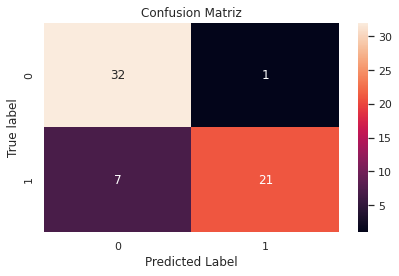

In [45]:
# importing the librarie for confusion matriz
# importar bibliotecas para a matriz da confusao
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Confusion Matriz")
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()


We can also print a classification report as you can see below.




In [46]:
# CLassification report
# Relatorio de classificacao 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        33
           1       0.95      0.75      0.84        28

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61





*   **Precision:** Accuracy of positive predictions.
*   **Recall:** Fraction of positives that were correctly identified.

*  **F1- score:** Is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0










# Conclusion

This is one way of doing a Machine Learning model, we can improve the accuracy of our model in many ways such as get more data, feature selection, evaluate metrics an the list goes on.
Hope you have enjoy it!